In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from scipy.stats import ttest_1samp, ttest_ind
import statsmodels.stats.api as sm
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

# Problem 1

## A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected

 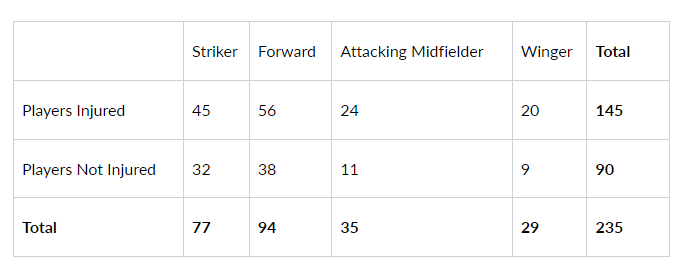

**1.1 What is the probability that a randomly chosen player would suffer an injury?**

**1.2 What is the probability that a player is a forward or a winger?**

**1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?**

**1.4 What is the probability that a randomly chosen injured player is a striker?**

**1.5 What is the probability that a randomly chosen injured player is either a forward or an attacking midfielder?** 


In [11]:
## 1.1 What is the probability that a randomly chosen player would suffer an injury?

prob_players_Injured = 145/235
round(prob_players_Injured,4)

0.617

In [12]:
## 1.2 What is the probability that a player is a forward or a winger?

prob_Forward_Winger = (94+29)/235
round(prob_Forward_Winger,4)

0.5234

In [13]:
## 1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

prob_strikerAndfootinjury = 45/235
round(prob_strikerAndfootinjury,4)

0.1915

In [14]:
## 1.4 What is the probability that a randomly chosen injured player is a striker?

prob_striker_given_injured = 45/145
round(prob_striker_given_injured,4)

0.3103

In [15]:
## 1.5 What is the probability that a randomly chosen injured player is either a forward or an attacking midfielder?

prob_forwardOrmidfielder_given_injured = (56+24)/145
round(prob_forwardOrmidfielder_given_injured,4)

0.5517

# Problem 2

**An independent research organization is trying to estimate the probability that an accident at a nuclear power plant will result in radiation leakage. The types of accidents possible at the plant are, fire hazards, mechanical failure, or human error. The research organization also knows that two or more types of accidents cannot occur simultaneously.**

**According to the studies carried out by the organization, the probability of a radiation leak in case of a fire is 20%, the probability of a radiation leak in case of a mechanical 50%, and the probability of a radiation leak in case of a human error is 10%. The studies also showed the following;**

**The probability of a radiation leak occurring simultaneously with a fire is 0.1%.**

**The probability of a radiation leak occurring simultaneously with a mechanical failure is 0.15%.**

**The probability of a radiation leak occurring simultaneously with a human error is 0.12%.**

**On the basis of the information available, answer the questions below:**

**2.1 What are the probabilities of a fire, a mechanical failure, and a human error respectively?**

**2.2 What is the probability of a radiation leak?**

**2.3 Suppose there has been a radiation leak in the reactor for which the definite cause is not known. What is the probability that it has been caused by:**

**A Fire.**

**A Mechanical Failure.**

**A Human Error.**

**Solution:** Let's Define the events as:

F stands For Fire Hazards

M stands For Mechanical Failure

H Stands For Human Error

R stands For Radiation Leakage

The Information provided as per question are following:
* Probability of Radiation leak in case of Fire, P(R|F)  = 0.2
* Probability of Radiation leak in case of Mechanical Hazards, P(R|M) = 0.5
* Probability of Radiation leak in case of Human Error, P(R|H) = 0.1
* probability of a radiation leak occurring simultaneously with a fire, P(RandF) = 0.001
* probability of a radiation leak occurring simultaneously with a Mechanical failure, P(RandM) = 0.0015
* probability of a radiation leak occurring simultaneously with a Human Error, P(RandH) = 0.0012

**2.1 What are the probabilities of a fire, a mechanical failure, and a human error respectively?**

In [4]:
# According to Conditional Probability, P(R|F) = P(RandF)/P(F)
# Hence, P(F) = P(RandF)/P(R|F)
Prob_Fire = 0.001/0.2
print("Probalility of fire:" , Prob_Fire)

Probalility of fire: 0.005


In [5]:
# According to Conditional Probability, P(R|M) = P(RandM)/P(M)
# Hence, P(M) = P(RandM)/P(R|M)
Prob_Mech = 0.0015/0.5
print("Probability of Mechanical Failure: ",Prob_Mech)

Probability of Mechanical Failure:  0.003


In [8]:
# According to Conditional Probability, P(R|H) = P(RandH)/P(H)
# Hence, P(H) = P(RandH)/P(R|H)
Prob_HumanError = 0.0012/0.1
print("Probability of Human Error: ",round(Prob_HumanError,3))

Probability of Human Error:  0.012


**2.2 What is the probability of a radiation leak?**

In [9]:
# P(R) = P(RandF) + P(RandM) + P(RandH)
Prob_RadiationLeakage = 0.001 + 0.0015 + 0.0012
print("Probability of Radiation Leakage: " , Prob_RadiationLeakage)

Probability of Radiation Leakage:  0.0037


**2.3 Suppose there has been a radiation leak in the reactor for which the definite cause is not known. What is the probability that it has been caused by:**

**A Fire.**

**A Mechanical Failure.**

**A Human Error.**

Here we have to find P(F|R) , P(M|R) and P(H|R)

According to Baye's Therom, P(RandF) = P(FandR) ,P(RandM)=P(MandR) and P(RandH)=P(HandR)

Hence, 

* P(F|R) = P(FandR)/P(R)
* P(M|R) = P(MandR)/P(R)
* P(H|R) = P(HandR)/P(R)


In [15]:
# probability of a radiation leak in the reactor due to a Fire:
# P(F|R) = P(FandR)/P(R)
prob_RadiationDueToFire = 0.001/0.0037
print("Probability of a radiation leak in the reactor due to a Fire:",round(prob_RadiationDueToFire,4))


Probability of a radiation leak in the reactor due to a Fire: 0.2703


In [16]:
# probability of a radiation leak in the reactor due to a Mechanical Failure:
# P(M|R) = P(MandR)/P(R)
Prob_RadiationDueToMechanical = 0.0015/0.0037
print("Probability of a radiation leak in the reactor due to a Mechanical Failure:", round(Prob_RadiationDueToMechanical,4))

Probability of a radiation leak in the reactor due to a Mechanical Failure: 0.4054


In [17]:
# probability of a radiation leak in the reactor due to a Human Error:
# P(H|R) = P(HandR)/P(R)
prob_RadiationDueToHumanError = 0.0012/0.0037
print("probability of a radiation leak in the reactor due to a Human Error:", round(prob_RadiationDueToHumanError,4))

probability of a radiation leak in the reactor due to a Human Error: 0.3243


# Problem 3:

**The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)**



**3.1 What proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm?**

**3.2 What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm.?**

**3.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?**

**3.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?**

###### Solutions:

###### 3.1 What proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm?

In [13]:
mu=5
sigma=1.5
prop = stats.norm.cdf(3.17,mu,sigma)
print("proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm is : ", round(prop,4))


proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm is :  0.1112


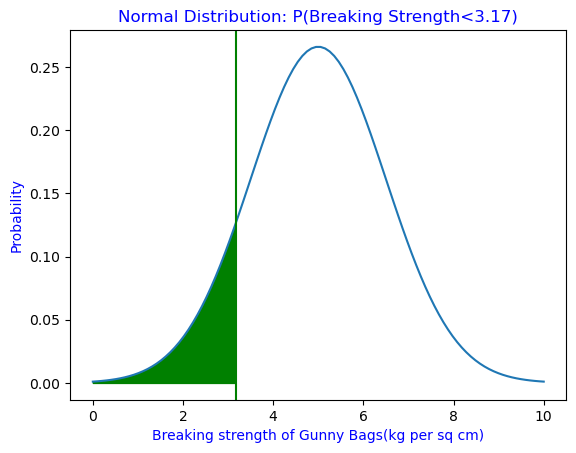

In [14]:
from scipy.stats import norm
#x=np.arange(0,11,2)
# x=np.linspace(-4,4,100)
x=np.linspace(0,10,100)    # since mean=5, so here we took 0,10 to plot symmetric distribution around mean.
plt.plot(x, norm.pdf(x,mu,sigma))
plt.axvline(x=3.17,c='g')
x1=np.linspace(0,3.17,20)
plt.fill_between(x1, norm.pdf(x1,mu,sigma),color='g')
plt.xlabel("Breaking strength of Gunny Bags(kg per sq cm)",color='blue')
plt.ylabel("Probability",color='blue')
plt.title("Normal Distribution: P(Breaking Strength<3.17)",color='blue')
plt.show()

###### 3.2 What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm.?

In [27]:
mu=5
sigma=1.5
prop= 1-stats.norm.cdf(3.6,mu,sigma)
print("proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm is: ", round(prop,4))

proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm is:  0.8247


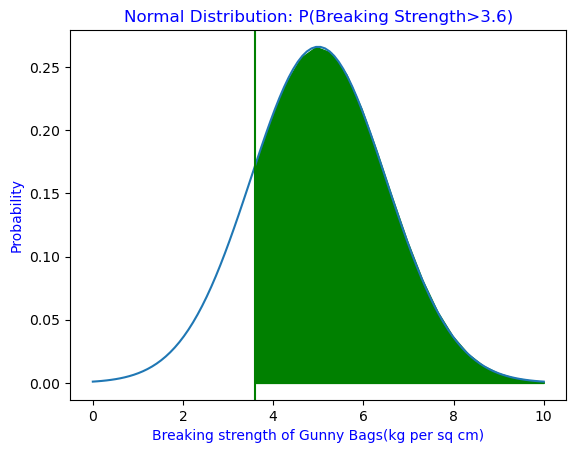

In [15]:
from scipy.stats import norm

x=np.linspace(0,10,100)
plt.plot(x, norm.pdf(x,mu,sigma))
plt.axvline(x=3.6,c='g')
x1=np.linspace(3.6,x.max(),20)
plt.fill_between(x1,norm.pdf(x1,mu,sigma),color='green')
plt.xlabel("Breaking strength of Gunny Bags(kg per sq cm)",color='blue')
plt.ylabel("Probability",color='blue')
plt.title("Normal Distribution: P(Breaking Strength>3.6)",color='blue')
plt.show()


###### 3.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

In [35]:
mu=5
sigma=1.5
prop = stats.norm.cdf(5.5,mu,sigma) - stats.norm.cdf(5,mu,sigma)
print("proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm is: ", round(prop,4))

proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm is:  0.1306


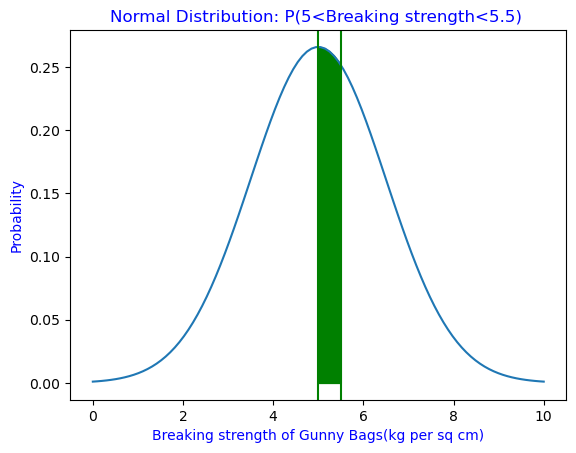

In [16]:
from scipy.stats import norm
x=np.linspace(0,10,100)
plt.plot(x, norm.pdf(x,mu,sigma))
plt.axvline(5,c='g')
plt.axvline(5.5,c='g')
x1=np.linspace(5,5.5,10)
plt.fill_between(x1, norm.pdf(x1,mu,sigma),color='green')
plt.xlabel("Breaking strength of Gunny Bags(kg per sq cm)",color='blue')
plt.ylabel("Probability",color='blue')
plt.title("Normal Distribution: P(5<Breaking strength<5.5) ",color='blue')
plt.show()

###### 3.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [16]:
mu=5
sigma=1.5
prop1 = stats.norm.cdf(7.5,mu,sigma) - stats.norm.cdf(3,mu,sigma)
prop2= 1-prop1
print("proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm. is: ",round(prop2,4))

proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm. is:  0.139


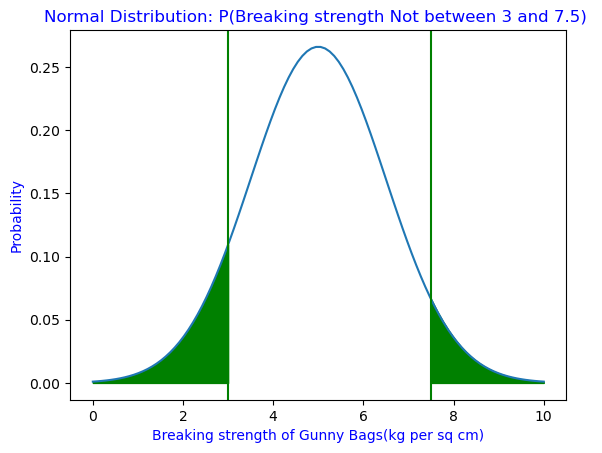

In [17]:
from scipy.stats import norm
x=np.linspace(0,10,100)
plt.plot(x, norm.pdf(x,mu,sigma))
plt.axvline(3,c='g')
plt.axvline(7.5,c='g')
x1=np.linspace(x.min(),3,20)
x2=np.linspace(7.5,x.max(),20)
plt.fill_between(x1, norm.pdf(x1,mu,sigma),color='green')
plt.fill_between(x2, norm.pdf(x2,mu,sigma),color='green')
plt.xlabel("Breaking strength of Gunny Bags(kg per sq cm)",color='blue')
plt.ylabel("Probability",color='blue')
plt.title("Normal Distribution: P(Breaking strength Not between 3 and 7.5) ",color='blue')
plt.show()

# Problem 4:

 

**Grades of the final examination in a training course are found to be normally distributed, with a mean of 77 and a standard deviation of 8.5. Based on the given information answer the questions below.**

 

**4.1 What is the probability that a randomly chosen student gets a grade below 85 on this exam?**

**4.2 What is the probability that a randomly selected student scores between 65 and 87?**

**4.3 What should be the passing cut-off so that 75% of the students clear the exam?**


 

##### Solutions:

**4.1 What is the probability that a randomly chosen student gets a grade below 85 on this exam?**

In [18]:
mu=77
sigma=8.5
prob = stats.norm.cdf(85,mu,sigma)
print("The probability that a randomly chosen student gets a grade below 85 on this exam is: ", round(prob,4))

The probability that a randomly chosen student gets a grade below 85 on this exam is:  0.8267


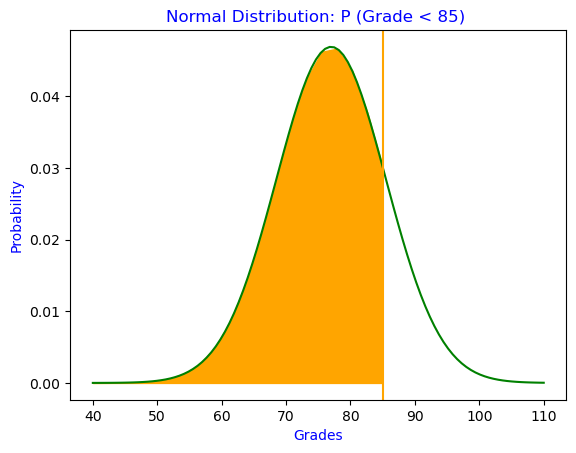

In [19]:
from scipy.stats import norm
x=np.linspace(40,110,100)
plt.plot(x, norm.pdf(x,mu,sigma),color='green')
plt.axvline(85,c='orange')
x1=np.linspace(x.min(),85,20)
plt.fill_between(x1, norm.pdf(x1,mu,sigma),color='orange')
plt.xlabel("Grades",color='blue')
plt.ylabel("Probability",color='blue')
plt.title("Normal Distribution: P (Grade < 85) ",color='blue')
plt.show()

**4.2 What is the probability that a randomly selected student scores between 65 and 87?**


In [62]:
mu=77
sigma=8.5
prob = stats.norm.cdf(87,mu,sigma) - stats.norm.cdf(65,mu,sigma)
print("The probability that a randomly selected student scores between 65 and 87 is: ",round(prob,4))

The probability that a randomly selected student scores between 65 and 87 is:  0.8013


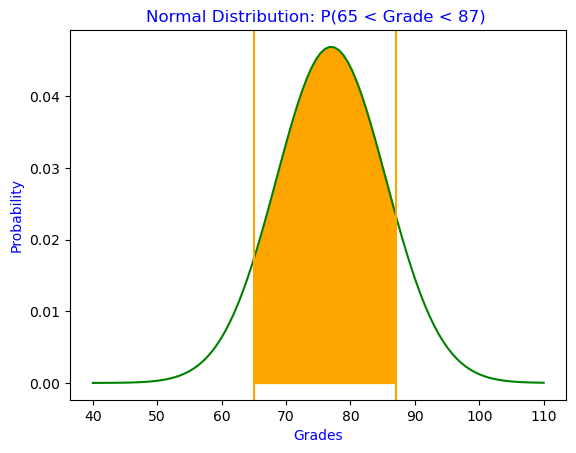

In [20]:
from scipy.stats import norm
x=np.linspace(40,110,100)
plt.plot(x,norm.pdf(x,mu,sigma),color='green')
plt.axvline(65,c='orange')
plt.axvline(87,c='orange')
x1=np.linspace(65,87,20)
plt.fill_between(x1,norm.pdf(x1,mu,sigma),color='orange')
plt.xlabel("Grades",color='blue')
plt.ylabel("Probability",color='blue')
plt.title("Normal Distribution: P(65 < Grade < 87) ",color='blue')
plt.show()

**4.3 What should be the passing cut-off so that 75% of the students clear the exam?**

In [5]:
mu=77
sigma=8.5
cut_off = stats.norm.ppf(0.25,mu,sigma)
print("The passing cut-off so that 75% of the students clear the exam is: ",round(cut_off,4))

The passing cut-off so that 75% of the students clear the exam is:  71.2668


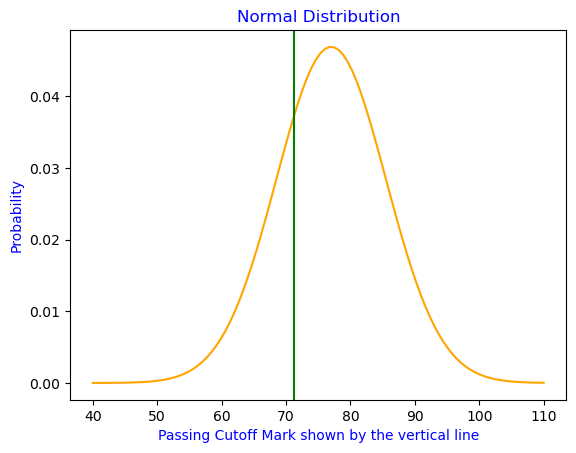

In [12]:
from scipy.stats import norm
x=np.linspace(40,110,100)
plt.plot(x,norm.pdf(x,mu,sigma),color='orange')
plt.axvline(cut_off,color='green')
plt.xlabel("Passing Cutoff Mark shown by the vertical line",color='blue')
plt.ylabel("Probability",color='blue')
plt.title("Normal Distribution",color='blue')
plt.show()

## Problem 5:

 

**Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);**

 

**5.1 Earlier experience of Zingaro with this particular client is favorable as the stone surface was found to be of adequate hardness. However, Zingaro has reason to believe now that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?**

**5.2 Is the mean hardness of the polished and unpolished stones the same?**

In [2]:
df=pd.read_csv("Zingaro_Company.csv")

In [3]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [6]:
df.shape

(75, 2)

##### 5.1 Earlier experience of Zingaro with this particular client is favorable as the stone surface was found to be of adequate hardness. However, Zingaro has reason to believe now that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

**Step 1: Define null and alternative hypotheses**
Here we need to test the hardness of unpolished stone.As per Zingaro’s believe unpolished stones may not be suitable for printing,so we can formulate the hypothesis as:

**Step 2: Decide the significance level**

Here we select  𝛼= 0.05 and the population standard deviation is not known.

**Step 3: Identify the test statistic**

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are same.
* The sample is large sample, n > 30. So we use the t distribution and the  𝑡𝑆𝑇𝐴𝑇 test statistic.

**Step 4: Calculate the p - value and test statistic**

We wiil use **scipy.stats.ttest_1samp** t_test to calculate the mean of one sample given the sample observations and the expected value in the null hypothesis. **This function returns t statistic and the two-tailed p value.**

In [4]:
t_statistic , p_value = ttest_1samp(df['Unpolished '],150)
print("t-Statistic: {0} \n P-Value: {1}".format(t_statistic,p_value))

t-Statistic: -4.164629601426757 
 P-Value: 8.342573994839304e-05


In [5]:
## The following is the pvalue for a one-tailed test.
P_value_oneTailed = p_value/2
P_value_oneTailed

4.171286997419652e-05

**Step 5: Decide to reject or accept null hypothesis**

In [6]:
alpha = 0.05
if P_value_oneTailed<alpha:
    print("We have enough Evidence to Reject the Null hypothesis against alternative hypothesis")
    print("The mean hardness of the 'Unpolished stone' is less than 150 Hence the unpolished stones may not be suitable for printing")
else:
    print("We Fail to Reject the Null Hypothesis")
    print("The Mean Hardness of the stone is suitable for Printing")
    
    

We have enough Evidence to Reject the Null hypothesis against alternative hypothesis
The mean hardness of the 'Unpolished stone' is less than 150 Hence the unpolished stones may not be suitable for printing


**With 95% confidence, we can say that we have enough evidence to say that the hardness for unpolished stones is less than 150. Thus Zingaro is right in its thinking that unpolished stones are not fit for printing.**

In [7]:
#The following code snippet helps us to find the critical value.

cv = stats.norm.ppf(0.05,0,1)
print(cv)

-1.6448536269514729


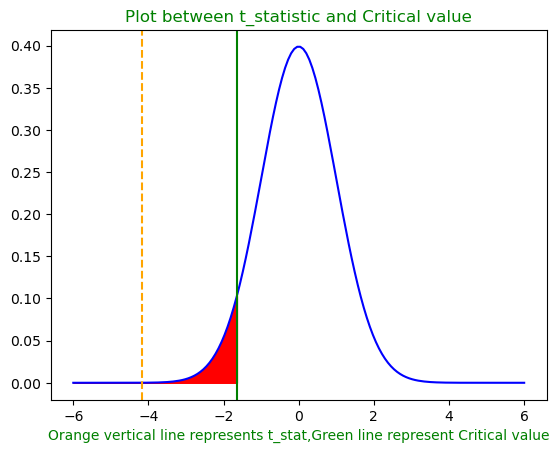

In [11]:
from scipy.stats import norm
# # plotting the distribution of Z test statistic along with the computed test statistic
x=np.linspace(-6,6,150)
# plt.plot(x,norm.pdf(x,0,1))
plt.plot(x, norm.pdf(x, 0, 1),color='blue') # plot the pdf of the normal distribution
plt.axvline(x = t_statistic, c = 'orange',linestyle='--') # draw a vertical green line through the mentioned point t_stat value
plt.axvline(x = cv, c = 'green')
x1 = np.linspace(-6,cv, 50) #
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the critical value with red color
plt.title("Plot between t_statistic and Critical value",color='green')
plt.xlabel("Orange vertical line represents t_stat,Green line represent Critical value",color='green')
plt.show() # display the plot

In [24]:
if t_statistic < cv:
    print("We Reject the Null Hypothesis since test_statistic value lies in the Rejection Region.")
else:
    print("We Fail to Reject The Null Hypothesis")

We Reject the Null Hypothesis since test_statistic value lies in the Rejection Region


**5.2 Is the mean hardness of the polished and unpolished stones the same?**

**Step 1: Define null and alternative hypotheses**

* H0 : The mean hardness of the polished and unpolished stones are same
* Ha : The mean hardness of the polished and unpolished stones are not same.

**Step 2: Decide the significance level**

Here we select 𝛼= 0.05 and the population standard deviation is not known.

**Step 3: Identify the test statistic**

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are same.
* The sample is large sample, n > 30. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic.
* This is a two tailed test.

**Step 4: Calculate the p - value and test statistic**

* This is a two tailed test.
* We will use the **scipy.stats.ttest_ind** to calculate the t-test for the means of TWO INDEPENDENT samples. 
* This function returns t statistic and two-tailed p value.

In [14]:
t_statistic, p_value  = ttest_ind(df['Unpolished '],df['Treated and Polished'])
print('tstat',t_statistic)    
print('P Value',p_value)    

tstat -3.2422320501414053
P Value 0.0014655150194628353


**Step 5: Decide to reject or accept null hypothesis**

In [35]:
alpha =0.05
if p_value<alpha:
    print("We have enough Evidence to Reject the Null hypothesis against alternative hypothesis")
    print("The mean hardness of the polished and unpolished stones are not same.")
else:
    print("We Fail to Reject the Null Hypothesis")
    print("The mean hardness of the polished and unpolished stones are same.")

We have enough Evidence to Reject the Null hypothesis against alternative hypothesis
The mean hardness of the polished and unpolished stones are not same.


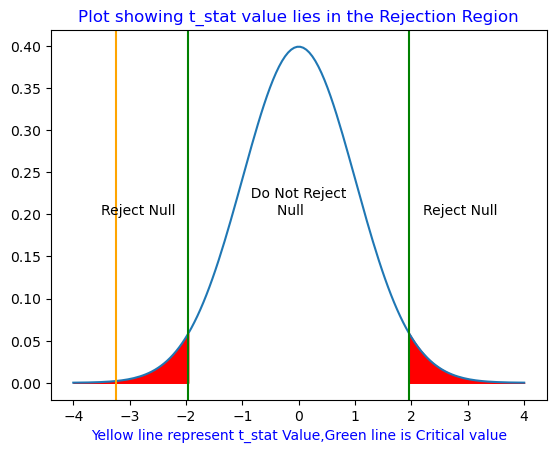

In [34]:
# import the required function
from scipy.stats import norm

# find the critical values
critical_val1 = norm.ppf(1-(0.05/2))
critical_val2 = norm.ppf(0.05/2)

x = np.linspace(-4,4,150)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(t_statistic,c='orange')
plt.axvline(x = critical_val1, c = 'g')
x1 = np.linspace(critical_val1, 4, 50) # 
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.axvline(x = critical_val2, c = 'g')
x2 = np.linspace(-4, critical_val2, 50) 
plt.fill_between(x2, norm.pdf(x2, 0, 1),color='r')
plt.annotate('Reject Null', (2.2, 0.20)) 
plt.annotate('Reject Null', (-3.5, 0.20)) 
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) 
plt.title("Plot showing t_stat value lies in the Rejection Region",color='blue')
plt.xlabel("Yellow line represent t_stat Value,Green line is Critical value",color ='blue')
plt.show() 

* As our test statistic value -3.24 lies in the rejection region, we can reject the null hypothesis and Accept the Alternate       hypothesis that The mean hardness of the polished and unpolished stones are not same.

## Problem 6:

 

### Aquarius health club, one of the largest and most popular cross-fit gyms in the country has been advertising a rigorous program for body conditioning. The program is considered successful if the candidate is able to do more than 5 push-ups, as compared to when he/she enrolled in the program. Using the sample data provided can you conclude whether the program is successful? (Consider the level of Significance as 5%)

### Note that this is a problem of the paired-t-test. Since the claim is that the training will make a difference of more than 5, the null and alternative hypotheses must be formed accordingly.

In [2]:
gym=pd.read_csv("Aquarius_gym.csv")

In [3]:
gym.head()

,Sr no.,Before,After
0,1,39,44
1,2,25,25
2,3,39,39
3,4,6,13
4,5,40,44


In [27]:
len(gym)

100

In [28]:
gym.shape

(100, 4)

**Step 1: Define null and alternative hypotheses**

* Let µ1 be the Mean push ups done by candidate before enrolment and µ2 be the Mean push ups done by candidate after enrolment.
* Null Hypothesis: Difference of Before and After push-ups less than or equal to 5.
* Alternate Hypothesis: Difference of Before and After push-ups morethan 5.

**Step 2: Decide the significance level**

Here we select  𝛼 = 0.05 as given in the question.

**Step 3: Identify the test statistic**

* Sample sizes for both samples are  same.
* We have two paired samples and we do not know the population standard deviation.
* The sample is large sample, n > 30. So you use the t distribution and the $t_{STAT}$ test statistic for two sample paired       test.
* Degree of Freedom: Since the sample is the same for both Sampling tests, we have N-1 degrees of freedom : 100-1=99

* Since the sole purpose of the test is to check whether The program is successful or not, we would prefer a One-sided T-test.

**Step 4: Calculate the p - value and test statistic**

* We use the **scipy.stats.ttest_rel** to calculate the T-test on TWO paired samples. 
* Here we give the two sample observations as input. This function returns t statistic and two-tailed p value.

In [5]:
t_stat , P_value = stats.ttest_rel(gym['Before'],gym['After'])
print('tstat  %1.3f' % t_stat)    
print("p-value for one-tail:", P_value/2)

tstat  -19.323
p-value for one-tail: 1.1460209626255983e-35


**Step 5: Decide to reject or accept null hypothesis**

In [8]:
alpha = 0.05
if P_value1<alpha:
    print("We have enough Evidence to Reject the Null hypothesis against alternative hypothesis")
    print("The program is considered successful since the candidate is able to do more than 5 push-ups")
else:
    print("We Fail to Reject the Null Hypothesis")
    print("The program is not successful since the candidate is able to do less than 5 push-ups")
    
    

We have enough Evidence to Reject the Null hypothesis against alternative hypothesis
The program is considered successful since the candidate is able to do more than 5 push-ups


## Problem 7:

#### Dental implant data: The hardness of metal implant in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as on the dentists who may favour one method above another and may work better in his/her favourite method. The response is the variable of interest.

**1. Test whether there is any difference among the dentists on the implant hardness. State the null and alternative hypotheses.    Note that both types of alloys cannot be considered together. You must state the null and alternative hypotheses separately    for the two types of alloys.?**

**2. Before the hypotheses may be tested, state the required assumptions. Are the assumptions fulfilled? Comment separately on      both alloy types.?**

**3. Irrespective of your conclusion in 2, we will continue with the testing procedure. What do you conclude regarding whether      implant hardness depends on dentists? Clearly state your conclusion. If the null hypothesis is rejected, is it possible to      identify which pairs of dentists differ?**

**4. Now test whether there is any difference among the methods on the hardness of dental implant, separately for the two types      of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which pairs of            methods    differ?**

**5. Now test whether there is any difference among the temperature levels on the hardness of dental implant, separately for        the    two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify          which levels    of temperatures differ?**

**6. Consider the interaction effect of dentist and method and comment on the interaction plot, separately for the two types of      alloys?**

**7. Now consider the effect of both factors, dentist, and method, separately on each alloy. What do you conclude? Is it            possible    to identify which dentists are different, which methods are different, and which interaction levels are            different?**

In [2]:
dental=pd.read_excel("Dental+Hardness+data.xlsx")

In [3]:
dental.head()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,1.0,1.0,1500.0,813.0,NaN,NaN,Anova: Two-Factor Without Replication,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1600.0,792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1700.0,792.0,NaN,NaN,SUMMARY,Count,Sum,Average,Variance,NaN,NaN
3,1.0,1.0,2.0,1500.0,907.0,NaN,NaN,1,4,2315,578.75,523721.583333,NaN,NaN
4,1.0,1.0,2.0,1600.0,792.0,NaN,NaN,1,4,2394,598.5,584819,NaN,NaN


In [4]:
dental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dentist      90 non-null     float64
 1   Method       90 non-null     float64
 2   Alloy        90 non-null     float64
 3   Temp         90 non-null     float64
 4   Response     90 non-null     float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   102 non-null    object 
 8   Unnamed: 8   100 non-null    object 
 9   Unnamed: 9   100 non-null    object 
 10  Unnamed: 10  99 non-null     object 
 11  Unnamed: 11  98 non-null     object 
 12  Unnamed: 12  3 non-null      object 
 13  Unnamed: 13  3 non-null      object 
dtypes: float64(7), object(7)
memory usage: 11.8+ KB


**Convrting the Datatype of columns Dentist, Method, Alloy, Temp to Categorical datatype**

In [4]:
dental['Dentist'] = pd.Categorical(dental['Dentist'])

In [5]:
dental['Method'] = pd.Categorical(dental['Method'])

In [6]:
dental['Alloy'] = pd.Categorical(dental['Alloy'])

In [7]:
dental['Temp'] = pd.Categorical(dental['Temp'])

In [8]:
dental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Dentist      90 non-null     category
 1   Method       90 non-null     category
 2   Alloy        90 non-null     category
 3   Temp         90 non-null     category
 4   Response     90 non-null     float64 
 5   Unnamed: 5   0 non-null      float64 
 6   Unnamed: 6   0 non-null      float64 
 7   Unnamed: 7   102 non-null    object  
 8   Unnamed: 8   100 non-null    object  
 9   Unnamed: 9   100 non-null    object  
 10  Unnamed: 10  99 non-null     object  
 11  Unnamed: 11  98 non-null     object  
 12  Unnamed: 12  3 non-null      object  
 13  Unnamed: 13  3 non-null      object  
dtypes: category(4), float64(3), object(7)
memory usage: 9.5+ KB


In [10]:
dental["Dentist"].value_counts()

1.0    18
2.0    18
3.0    18
4.0    18
5.0    18
Name: Dentist, dtype: int64

In [11]:
dental['Alloy'].value_counts()

1.0    45
2.0    45
Name: Alloy, dtype: int64

In [12]:
dental['Method'].value_counts()

1.0    30
2.0    30
3.0    30
Name: Method, dtype: int64

In [13]:
dental['Temp'].value_counts()

1500.0    30
1600.0    30
1700.0    30
Name: Temp, dtype: int64

**Now Let's Subset the Dataset based on Alloy 1 and Alloy 2:**


In [9]:
dental_alloy1 = dental[dental['Alloy']==1.0].reset_index(drop=True)
dental_alloy2 = dental[dental['Alloy']==2.0].reset_index(drop=True)

In [10]:
dental_alloy1.head()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,1.0,1.0,1500.0,813.0,NaN,NaN,Anova: Two-Factor Without Replication,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1600.0,792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1700.0,792.0,NaN,NaN,SUMMARY,Count,Sum,Average,Variance,NaN,NaN
3,1.0,2.0,1.0,1500.0,782.0,NaN,NaN,1,4,2410,602.5,540209.666667,NaN,NaN
4,1.0,2.0,1.0,1600.0,698.0,NaN,NaN,1,4,2395,598.75,584420.916667,NaN,NaN


In [12]:

dental_alloy2.head()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,1.0,2.0,1500.0,907.0,NaN,NaN,1,4,2315,578.75,523721.583333,NaN,NaN
1,1.0,1.0,2.0,1600.0,792.0,NaN,NaN,1,4,2394,598.5,584819,NaN,NaN
2,1.0,1.0,2.0,1700.0,835.0,NaN,NaN,1,4,2494,623.5,654085.666667,NaN,NaN
3,1.0,2.0,2.0,1500.0,1115.0,NaN,NaN,1,4,2285,571.25,518740.916667,NaN,NaN
4,1.0,2.0,2.0,1600.0,835.0,NaN,NaN,1,4,2301,575.25,574519.583333,NaN,NaN


**7.1. Test whether there is any difference among the dentists on the implant hardness. State the null and alternative hypotheses. Note that both types of alloys cannot be considered together. You must state the null and alternative hypotheses separately for the two types of alloys.?**

**Hypothesis Formulation**
1. For Alloy 1 Null and Alternate Hypothesis:

        H0 : The Mean Implant hardness is same across all Dentist for alloy 1.   

        Ha : The Mean Implant hardness is not same for atleast one pair of Dentist for alloy 1.
      

2. For Alloy 2 Null and Alternate Hypothesis:

        H0 : The Mean Implant hardness is same across all Dentist for alloy 2.   

        Ha : The Mean Implant hardness is not same for atleast one pair of Dentist for alloy 2.



In [31]:
formula = 'Response ~ C(Dentist)'
model = ols(formula,dental_alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


* As p_value > 0.05(alpha),  we fail to Reject the Null Hypothesis and Hence we can say that the mean implant hardness is same across all the Dentist for Alloy 1

In [32]:
formula = 'Response ~ C(Dentist)'
model = ols(formula,dental_alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


* As p_value > 0.05(alpha),  we fail to Reject the Null Hypothesis and Hence we can say that the mean implant hardness is same across all the Dentist for Alloy 2

**3. Irrespective of your conclusion in 2, we will continue with the testing procedure. What do you conclude regarding whether implant hardness depends on dentists? Clearly state your conclusion. If the null hypothesis is rejected, is it possible to identify which pairs of dentists differ?**

In [33]:
formula = 'Response ~ C(Dentist)'
model = ols(formula,dental_alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


* As p_value > 0.05(alpha) we fail to Reject the Null Hypothesis and Hence we can say that The mean implant hardness is same       across all the Dentist for Alloy 1
* Since the null hypothesis is not Rejected it is not possible to identify which pair of dentists differ .The mean hardness is     same across all all the dentist.

<Axes: xlabel='Dentist', ylabel='Response'>

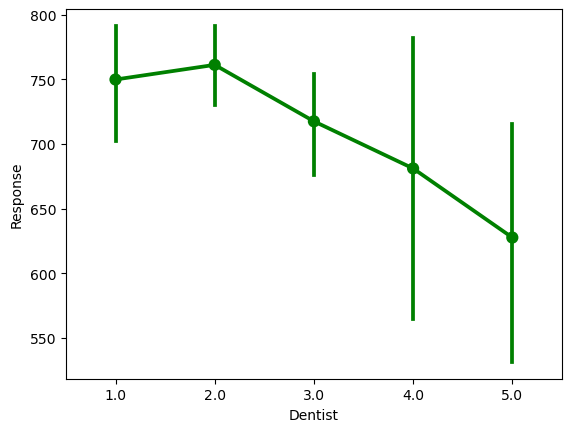

In [57]:
sns.pointplot(x='Dentist',y='Response',data=dental_alloy1,color='green')

In [34]:
formula = 'Response ~ C(Dentist)'
model = ols(formula,dental_alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


* As p_value > 0.05(alpha) we fail to Reject the Null Hypothesis and Hence we can say that The mean implant hardness is same       across all the Dentist for Alloy 2
* Since the null hypothesis is not Rejected it is not possible to identify which pair of dentists differ .The mean hardness is     same across all all the dentist.

<Axes: xlabel='Dentist', ylabel='Response'>

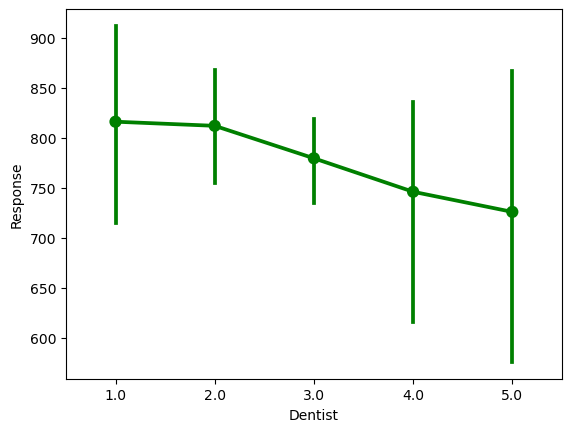

In [58]:
sns.pointplot(x='Dentist',y='Response',data=dental_alloy2,color='green')

**4. Now test whether there is any difference among the methods on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which pairs of methods differ?**

**Hypothesis Formulation**
1. For Alloy 1 Null and Alternate Hypothesis:

        H0 : The Mean Implant hardness is same across all the Methods for alloy 1.   

        Ha : The Mean Implant hardness is not same for atleast one pair of Method for alloy 1.
      

2. For Alloy 2 Null and Alternate Hypothesis:

        H0 : The Mean Implant hardness is same across all the Methods for alloy 2.   

        Ha : The Mean Implant hardness is not same for atleast one pair of Method for alloy 2.


In [35]:
formula = 'Response ~ C(Method)'
model = ols(formula,dental_alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


* As p_value < 0.05(alpha) , We Reject the Null Hypothesis and hence we can say that The Mean Implant hardness is not same for atleast one pair of Method for alloy 1.

Text(0.5, 1.0, 'The Mean Implant hardness for Alloy 1')

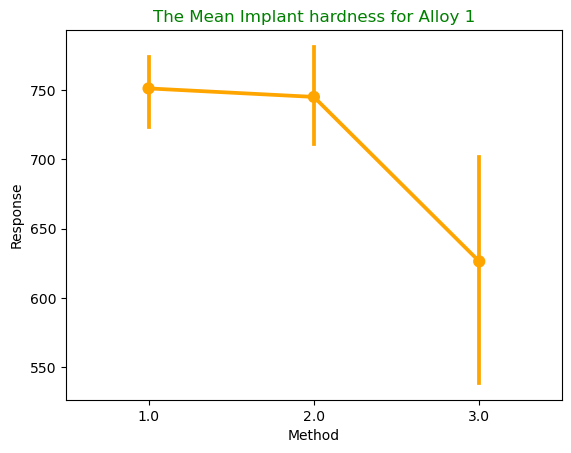

In [43]:
sns.pointplot(x='Method',y='Response',data=dental_alloy1,color='orange')
plt.title("The Mean Implant hardness for Alloy 1",color='green')

**Insights:**
It is now clear that for Alloy 1 mean Implant Hardness for Method 1.0 and 2.0 is similar but Implant hardness for Method 3.0 is              significantly different from these two.


In [36]:
formula = 'Response ~ C(Method)'
model = ols(formula,dental_alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


* As p_value < 0.05(alpha) , We Reject the Null Hypothesis and hence we can say that The Mean Implant hardness is not same for atleast one pair of Method for alloy 2.

Text(0.5, 1.0, 'The Mean Implant hardness for Alloy 2')

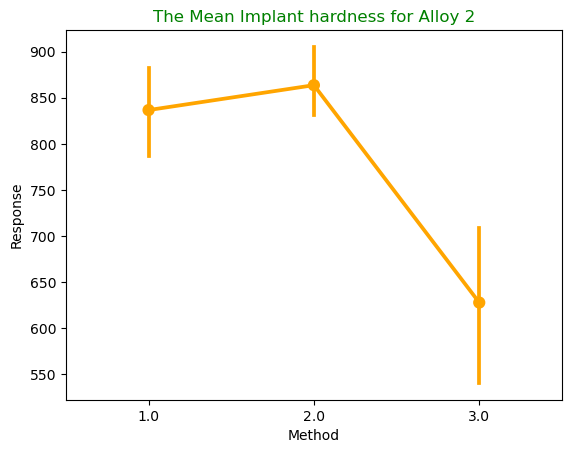

In [44]:
sns.pointplot(x='Method',y='Response',data=dental_alloy2,color='orange')
plt.title("The Mean Implant hardness for Alloy 2",color='green')

**Insights:**
It is now clear that for Alloy 2 mean Implant Hardness for Method 1.0 and 2.0 is similar but Implant hardness for Method 3.0 is              significantly different from these two.

**As the null hypothesis is rejected, now it is possible to identify which pairs of methods differ.**

To identify which pair of Methods Differ we will use **Tukey Hsd Test**

In [54]:
# Posthoc test: Tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Multicomp = pairwise_tukeyhsd(dental_alloy1['Response'],dental_alloy1['Method'])
print(Multicomp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
   1.0    2.0   -6.1333  0.987  -102.714  90.4473  False
   1.0    3.0    -124.8 0.0085 -221.3807 -28.2193   True
   2.0    3.0 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


**Summary:**

* P-value is significant for comparing Implant Hardness mean levels for the pair 1.0 - 1.3 and 2.0 - 3.0, but not for 1.0 - 2.0

* The null hypothesis of equality of all population means is rejected.
* It is now clear that mean Implant Hardness for Method 1.0 and 2.0 is similar but Implant hardness for Method 3.0 is             significantly different from these two.

In [63]:
Multicomp = pairwise_tukeyhsd(dental_alloy2['Response'],dental_alloy2['Method'])
print(Multicomp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
   1.0    2.0     27.0 0.8212  -82.4546  136.4546  False
   1.0    3.0   -208.8 0.0001 -318.2546  -99.3454   True
   2.0    3.0   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


**Summary:**

* P-value is significant for comparing Implant Hardness mean levels for the pair 1.0 - 1.3 and 2.0 - 3.0, but not for 1.0 - 2.0
* The null hypothesis of equality of all population means is rejected.
* It is now clear that mean Implant Hardness for Method 1.0 and 2.0 is similar but Implant hardness for Method 3.0 is             significantly different from these two.

**5. Now test whether there is any difference among the temperature levels on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which levels of temperatures differ?**

**Hypothesis Formulation:**

For Alloy 1 Null and Alternate Hypothesis:

      H0 : The Mean Implant hardness is same across all the Temperature for alloy 1.   

      Ha : The Mean Implant hardness is not same for atleast one pair of Temperature for alloy 1.
 
For Alloy 2 Null and Alternate Hypothesis:

      H0 : The Mean Implant hardness is same across all the Temperature for alloy 2.   

      Ha : The Mean Implant hardness is not same for atleast one pair of Temperature for alloy 2.

In [13]:
formula = 'Response ~ Temp'
model = ols(formula,dental_alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

            df         sum_sq       mean_sq         F    PR(>F)
Temp       2.0   10154.444444   5077.222222  0.335224  0.717074
Residual  42.0  636122.800000  15145.780952       NaN       NaN


**Conclusions:**

* As p_value > 0.05(alpha) we fail to Reject the Null Hypothesis and Hence we can say that The mean implant hardness is same       across all the Temperature level for Alloy 1
* Since the null hypothesis is not Rejected it is not possible to identify which pair of Temperature differs .The mean hardness   is same across all all the Temperature levels.

Text(0.5, 0, 'Temperature')

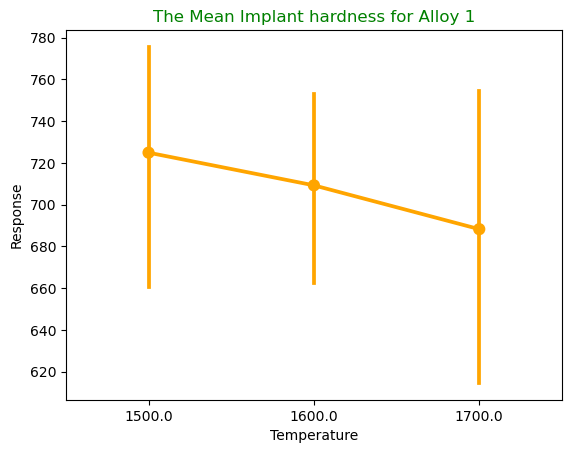

In [9]:
sns.pointplot(x='Temp',y='Response',data=dental_alloy1,color='orange');
plt.title("The Mean Implant hardness for Alloy 1",color='green')
plt.xlabel("Temperature")

In [14]:
formula = 'Response ~ Temp'
model = ols(formula,dental_alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

            df        sum_sq       mean_sq         F    PR(>F)
Temp       2.0  9.374893e+04  46874.466667  1.883492  0.164678
Residual  42.0  1.045254e+06  24886.996825       NaN       NaN


**Conclusions:**
* As p_value > 0.05(alpha) we fail to Reject the Null Hypothesis and Hence we can say that The mean implant hardness is same       across all the Temperature level for Alloy 2
* Since the null hypothesis is not Rejected it is not possible to identify which pair of Temperature differs .The mean hardness   is same across all all the Temperature levels.

Text(0.5, 0, 'Temperature')

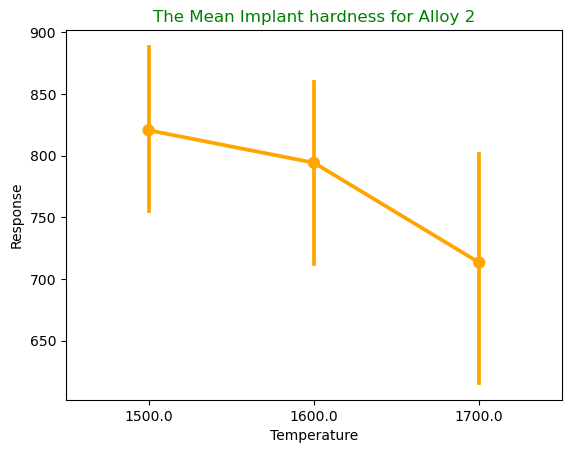

In [10]:
sns.pointplot(x='Temp',y='Response',data=dental_alloy2,color='orange')
plt.title("The Mean Implant hardness for Alloy 2",color='green')
plt.xlabel("Temperature")

**6. Consider the interaction effect of dentist and method and comment on the interaction plot, separately for the two types of alloys?**

In [17]:
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula,dental_alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


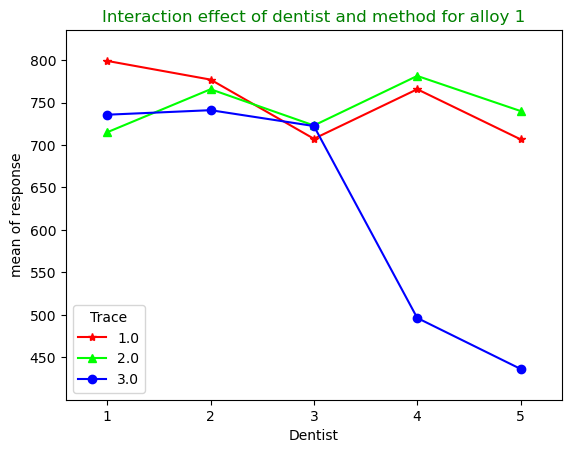

In [24]:
# Method of drawing an interaction plot

from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(np.array(dental_alloy1['Dentist']),np.array(dental_alloy1['Method']),np.array(dental_alloy1['Response']),markers=['*','^','o']);
plt.xlabel("Dentist")
plt.ylabel("mean of response")
plt.title("Interaction effect of dentist and method for alloy 1",color='green');

**Conclusions:**

* We can conclude that the mean hardness of dental implant is not same when different dentists are using different methods for     alloy 1.This interaction is very significant here.

In [29]:
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula,dental_alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


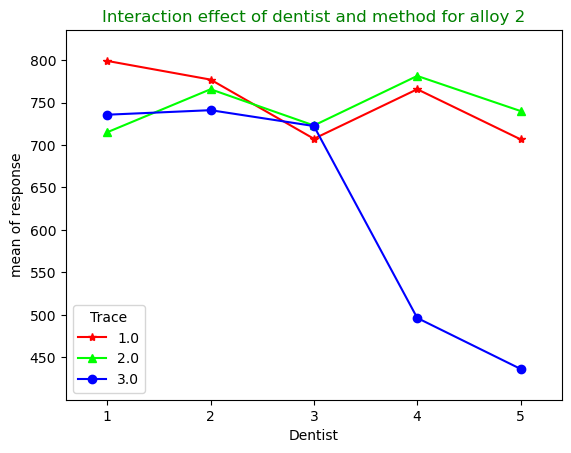

In [25]:
interaction_plot(np.array(dental_alloy1['Dentist']),np.array(dental_alloy1['Method']),np.array(dental_alloy1['Response']),markers=['*','^','o']);
plt.xlabel("Dentist")
plt.ylabel("mean of response")
plt.title("Interaction effect of dentist and method for alloy 2",color='green');

**Conclusions:**

* We can conclude that the mean hardness of dental implant is not same when different dentists are using different methods for     alloy 2.This interaction is very significant here.

**7.7 Now consider the effect of both factors, dentist, and method, separately on each alloy. What do you conclude? Is it            possible    to identify which dentists are different, which methods are different, and which interaction levels are            different?**

**Hypothesis test formulation for Alloy 1**

* H0: The mean implant hardness is same across different Dentists for Alloy 1.

* HA: Mean implant hardness is not same for atleast one pair of Dentist for Alloy 1.

* H0: The mean implant hardness is same across different Methods for Alloy 1.

* HA: Mean implant hardness is not same for atleast one pair of Methods type for Alloy 1. 

* H0: There is no interaction between Dentist and Method types for Alloy 1.

* HA: There is interaction between Dentist and Method types for Alloy 1. 

In [30]:
formula = 'Response ~ C(Dentist) + C(Method)'
model = ols(formula,dental_alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  2.591255  0.051875
C(Method)    2.0  148472.177778  74236.088889  7.212522  0.002211
Residual    38.0  391121.377778  10292.667836       NaN       NaN


* As P> 0.05 for Dentist, There is no evidence that there is any differnce in Dental implant hardness due to Dentists.
* we fail to Reject the Null Hypothesis and Hence we can say that the mean implant hardness is same across all the Dentist for     Alloy 1
* As P<0.05 for Methods, We Reject the Null Hypothesis and hence we can say that The Mean Implant hardness is not same for         atleast one pair of Method for alloy 1.
* Methods is a significant cause for Dental hardness ,Dentists is not a significant cause for Dental Hardness.

**Let's Find which method is different using Tukey HDS test.**

In [11]:
# Posthoc test: Tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Multicomp = pairwise_tukeyhsd(dental_alloy1['Response'],dental_alloy1['Method'])
print(Multicomp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
   1.0    2.0   -6.1333  0.987  -102.714  90.4473  False
   1.0    3.0    -124.8 0.0085 -221.3807 -28.2193   True
   2.0    3.0 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


**Conclusion:**
*  P-value is significant for comparing Implant Hardness mean levels for the pair 1.0 - 1.3 and 2.0 - 3.0, but not for 1.0 - 2.0
* The null hypothesis of equality of all population means is rejected.
* It is now clear that mean Implant Hardness for Method 1.0 and 2.0 is similar but Implant hardness for Method 3.0 is             significantly different from these two.

In [32]:
# With interaction 
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula,dental_alloy1).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


* As P_value < 0.05, We reject the null hypothesis and accept the alternate hypothesis that There is interaction between Dentist   and Method types with type 1 Alloy. 
* Dentist, Method and their interaction all are significant.

**Hypothesis test formulation for Alloy 2**

* H0: The mean implant hardness is same across different Dentists for Alloy 2.

* HA: Mean implant hardness is not same for atleast one pair of Dentist for Alloy 2.

* H0: The mean implant hardness is same across different Methods for Alloy 2.

* HA: Mean implant hardness is not same for atleast one pair of Methods for Alloy 2. 

* H0: There is no interaction between Dentist and Method types for Alloy 2.

* HA: There is interaction between Dentist and Method types for Alloy 2. 

In [33]:
formula = 'Response ~ C(Dentist) + C(Method)'
model = ols(formula,dental_alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)   4.0   56797.911111   14199.477778   0.926215  0.458933
C(Method)    2.0  499640.400000  249820.200000  16.295479  0.000008
Residual    38.0  582564.488889   15330.644444        NaN       NaN


* As P> 0.05 for Dentist, There is no evidence that there is any differnce in Dental implant hardness due to Dentists.
* we fail to Reject the Null Hypothesis and Hence we can say that the mean implant hardness is same across all the Dentist for     Alloy 2
* As P<0.05 for Methods, We Reject the Null Hypothesis and hence we can say that The Mean Implant hardness is not same for         atleast one pair of Method for alloy 2.
* Methods is a significant cause for Dental hardness ,Dentists is not a significant cause for Dental Hardness.

**Let's Find which method is different using Tukey HDS test.**

In [12]:
# Posthoc test: Tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Multicomp = pairwise_tukeyhsd(dental_alloy2['Response'],dental_alloy2['Method'])
print(Multicomp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
   1.0    2.0     27.0 0.8212  -82.4546  136.4546  False
   1.0    3.0   -208.8 0.0001 -318.2546  -99.3454   True
   2.0    3.0   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


**Conclusion:**
* P-value is significant for comparing Implant Hardness mean levels for the pair 1.0 - 1.3 and 2.0 - 3.0, but not for 1.0 - 2.0
* The null hypothesis of equality of all population means is rejected.
* It is now clear that mean Implant Hardness for Method 1.0 and 2.0 is similar but Implant hardness for Method 3.0 is             significantly different from these two.

In [35]:
# With interaction 
formula = 'Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula,dental_alloy2).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


* Here P_Value > 0.05, For interaction effect we fail to reject the null hypothesis and hence conclude that There is no            interaction between Dentist and Method types with type 2 Alloy.